In [45]:
'''a demo of the hopfield network'''
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [46]:
def show_letter(pattern):
    f, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.imshow(pattern.reshape(side_len, side_len), cmap='bone_r')
    ax.set_axis_off()
    f.tight_layout()


def pattern_complete(weights, X, n_iter=10, soft=True):
    Xs = [None] * n_iter
    for i in range(n_iter):
        X = np.dot(X, weights)
        if soft:
            X = np.tanh(X)
        else:
            X[x < 0] = -1
            X[x >= 0] = 1
        Xs[i] = X
    return Xs


def add_noise(x_, noise_level=.2):
    noise = np.random.choice(
        [1, -1], size=len(x_), p=[1-noise_level, noise_level])
    return x_ * noise

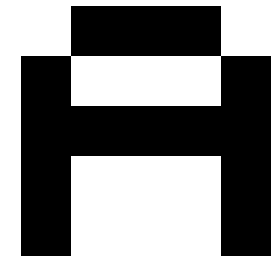

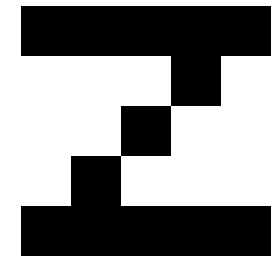

In [47]:
# make some patterns
side_len = 5
A = np.array([
    [-1, 1, 1, 1, -1],
    [1, -1, - 1, -1, 1],
    [1, 1, 1, 1, 1],
    [1, -1, - 1, -1, 1],
    [1, -1, - 1, -1, 1],
]).reshape(-1)

Z = np.array([
    [1, 1, 1, 1, 1],
    [-1, -1, -1, 1, -1],
    [-1, -1, 1, -1, - 1],
    [-1, 1, -1, -1, -1],
    [1, 1, 1, 1, 1],
]).reshape(-1)

# show the patterns
show_letter(A)
show_letter(Z)

In [48]:
# memorize the patterns
X = np.array([A, Z])
m, n_units = np.shape(X)
weights = np.zeros((n_units, n_units))
for x in X:
    weights += np.outer(x, x) / m
weights[np.diag_indices(n_units)] = 0

# show the test pattern again
x_test = A
# show_letter(x_test)

# add noise
noise_level = .25
x_test = add_noise(x_test, noise_level=noise_level)
# show_letter(x_test)

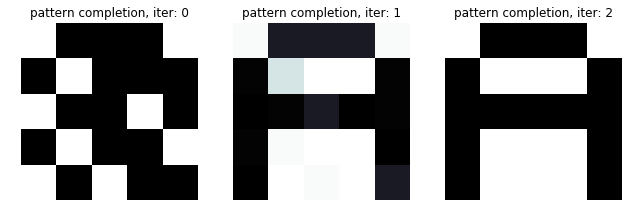

In [50]:
# pattern completion
n_iter = 2
x_hats = pattern_complete(weights, x_test, n_iter=n_iter)
# show_letter(x_hats[-1])

f, axes = plt.subplots(1, n_iter+1, figsize=((n_iter+1)*3, 3))
x_hats.insert(0, x_test)
for i in range(n_iter+1):
    axes[i].imshow(x_hats[i].reshape(side_len, side_len), cmap='bone_r')
    axes[i].set_axis_off()
    axes[i].set_title(f'pattern completion, iter: {i}')
f.tight_layout()
# f.savefig('pc.png', dpi=100, bbox_inches='tight')